# Analysing Employee Exit Surveys

In this project, we'll aim to answer two main questions:
 - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
 
We'll be looking at two different datasets, which are the employee exit surveys for the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute, which are both based in Queensland, Australia. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#This reads in the data into a dataframe
dete_survey = pd.read_csv('dete_survey.csv') 
tafe_survey = pd.read_csv('tafe_survey.csv')

## Exploring the data

In [3]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
tafe_survey.shape #shape tells us the number of rows and columns in a dataframe

(702, 72)

In [7]:
dete_survey.shape

(822, 56)

The TAFE survey contains 16 more columns than the DETE survey. However, the DETE survey contains more rows than the TAFE survey. Also, considering the amount of null values in the Aborignal column for both surveys, we can say that there aren't many Aborignal employees who have left.

In [8]:
dete_survey['SeparationType'].value_counts(normalize=True)

Age Retirement                          0.346715
Resignation-Other reasons               0.182482
Resignation-Other employer              0.110706
Resignation-Move overseas/interstate    0.085158
Voluntary Early Retirement (VER)        0.081509
Ill Health Retirement                   0.074209
Other                                   0.059611
Contract Expired                        0.041363
Termination                             0.018248
Name: SeparationType, dtype: float64

In [9]:
tafe_survey['Reason for ceasing employment'].value_counts(normalize=True)

Resignation                 0.485021
Contract Expired            0.181170
Retrenchment/ Redundancy    0.148359
Retirement                  0.116976
Transfer                    0.035663
Termination                 0.032810
Name: Reason for ceasing employment, dtype: float64

In [10]:
dete_survey['Age'].value_counts(normalize=True)

61 or older      0.273736
56-60            0.214550
51-55            0.127004
46-50            0.077682
41-45            0.075216
26-30            0.070284
36-40            0.062885
21-25            0.049322
31-35            0.048089
20 or younger    0.001233
Name: Age, dtype: float64

In [11]:
tafe_survey['CurrentAge. Current Age'].value_counts(normalize=True)

56 or older      0.271812
51-55            0.137584
41  45           0.134228
46  50           0.098993
31  35           0.087248
36  40           0.085570
26  30           0.083893
21  25           0.073826
20 or younger    0.026846
Name: CurrentAge. Current Age, dtype: float64

For both surveys, the least common reason for ending employment was termination, i.e. being fired. Also, the employees leaving  tend towards being older, with around 27% of employees leaving in the DETE survey being 61 or older, which might explain why the most common reason for leaving in the DETE survey was retirement. Interestingly, although the employees leaving also tended to be older in the TAFE survey as well, with ~27% being 56 or older, the most common reason for leaving TAFE was resignation instead, with retirement being the 4th most common reason.

## Cleaning the data and dropping irrelevant columns

In [12]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [13]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

Many of the columns in both surveys are not relevant for answering the questions that we aim to answer.

In [14]:
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated') #this ensures that Not Stated is counted as a null value

In [15]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [16]:
#dete_survey_col_names = dete_survey.columns.values.tolist() #this converts column names from being in an index to a list
#tafe_survey_col_names = tafe_survey.columns.values.tolist()

In [17]:
#print(dete_survey.columns[28:49])

In [18]:
#print(tafe_survey.columns[17:66])

We're going to drop columns 28 to 49 from the DETE survey and columns 17 to 66 from the TAFE survey, as they don't contain information that's relevant to the questions that we aim to answer. 

In [19]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [20]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [21]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

In [22]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()

dete_survey_updated = dete_survey_updated.rename(columns={'separationtype': 'separation_type'})

In [23]:
print(dete_survey_updated.columns)

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [24]:
map_dict = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separation_type', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(columns=map_dict)

print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


I changed some of the column naems in the TAFE survey in order for them to match with the DETE survey column names. I also made some of the column names in both surveys in snake case for ease of reading.

In [25]:
## Cleaning the age column in the TAFE survey so its formatting is similar to the DETE survey ##

tafe_survey_updated['age'] = tafe_survey_updated['age'].str.replace('\s+','-')

tafe_survey_updated['age'] = tafe_survey_updated['age'].str.replace('56-or-older','56 or older').str.replace('20-or-younger','20 or younger')

tafe_survey_updated['age'].value_counts(normalize=True)

56 or older      0.271812
51-55            0.137584
41-45            0.134228
46-50            0.098993
31-35            0.087248
36-40            0.085570
26-30            0.083893
21-25            0.073826
20 or younger    0.026846
Name: age, dtype: float64

## Investigating the separation type column

In [26]:
dete_survey_updated["separation_type"].value_counts(normalize=True)

Age Retirement                          0.346715
Resignation-Other reasons               0.182482
Resignation-Other employer              0.110706
Resignation-Move overseas/interstate    0.085158
Voluntary Early Retirement (VER)        0.081509
Ill Health Retirement                   0.074209
Other                                   0.059611
Contract Expired                        0.041363
Termination                             0.018248
Name: separation_type, dtype: float64

In [27]:
tafe_survey_updated["separation_type"].value_counts(normalize=True)

Resignation                 0.485021
Contract Expired            0.181170
Retrenchment/ Redundancy    0.148359
Retirement                  0.116976
Transfer                    0.035663
Termination                 0.032810
Name: separation_type, dtype: float64

In [28]:
#Selecting only the rows where resignation was the reason for leaving#

dete_resignations = dete_survey_updated[dete_survey_updated['separation_type'].str.contains('Resignation')].copy()
# I had to  do str.contains() as there are multiple resignatino types in the DETE survey
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separation_type'] == 'Resignation'].copy()

In [29]:
#print(dete_resignations)

From here on out, we'll be using the dete_resignations and tafe_resignations dataframes to carry out the remaining analysis.

In [30]:
print('DETE resignation dates')
print(dete_resignations['cease_date'].value_counts())

DETE resignation dates
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64


I'm going to convert the resignation dates above into being years only, as knowing just the year is relevant for answering our questions. 

In [31]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [32]:
print('DETE start dates')
print(dete_resignations['dete_start_date'].value_counts())

DETE start dates
2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64


In [33]:
print('TAFE resignation dates')
print(tafe_resignations['cease_date'].value_counts())

tafe_resignations['cease_date'] = tafe_resignations['cease_date'].astype("float")

TAFE resignation dates
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


The end and start dates all make sense.

In [34]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [35]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

In [36]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [37]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations['institute_service'].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

In [38]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 36 columns):
id                                     311 non-null int64
separation_type                        311 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_envir

I subtracted the start year from the year that the employees resigned to calculate how long they were employed at DETE. 

Next I'm going to categorise the values calculated so that they match up with the categories in the TAFE institute service column.

In [39]:
## Categorising years ##

#def transform_service(val):
 #   if val < 1:
  #      return "Less than 1 year"
   # elif 1 <= val <= 2:
    #    return "1-2"
    #elif 3 <= val <= 4:
    #    return "3-4"
    #elif 5 <= val <= 6:
    #    return "5-6"
    #elif 7 <= val <= 10:
    #    return "7-10"
    #elif 11 <= val <= 20:
    #    return "11-20"
    #elif val > 20:
    #    return "More than 20 years"
    #else:
    #    return np.nan

#dete_resignations['service_cat'] = dete_resignations['institute_service'].apply(transform_service)

#dete_resignations['service_cat'].value_counts().sort_index(ascending=True)

In [40]:
## Categorising years ##

dete_resignations.loc[dete_resignations["institute_service"] <= 1.0, "service_label"] = 'Less than 1 year' 
dete_resignations.loc[(dete_resignations["institute_service"] >= 1.0) & (dete_resignations["institute_service"] <= 2.0), "service_label"] = '1-2'
dete_resignations.loc[(dete_resignations["institute_service"] >= 3.0) & (dete_resignations["institute_service"] <= 4.0), "service_label"] = '3-4'
dete_resignations.loc[(dete_resignations["institute_service"] >= 5.0) & (dete_resignations["institute_service"] <= 6.0), "service_label"] = '5-6'
dete_resignations.loc[(dete_resignations["institute_service"] >= 7.0) & (dete_resignations["institute_service"] <= 10.0), "service_label"] = '7-10'
dete_resignations.loc[(dete_resignations["institute_service"] >= 11.0) & (dete_resignations["institute_service"] <= 20.0), "service_label"] = '11-20'
dete_resignations.loc[dete_resignations["institute_service"] > 20.0, "service_label"] = 'More than 20 years'
#dete_resignations.loc[dete_resignations["institute_service"] == np.nan, "service_label"] = np.nan

dete_resignations['service_label'].value_counts()

11-20                 57
More than 20 years    43
7-10                  41
5-6                   40
3-4                   36
1-2                   36
Less than 1 year      20
Name: service_label, dtype: int64

In [41]:
dete_resignations.tail()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,service_label
808,810,Resignation-Other reasons,2013.0,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,26-30,NaN,NaN,NaN,NaN,NaN,3.0,3-4
815,817,Resignation-Other employer,2014.0,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,21-25,NaN,NaN,NaN,NaN,NaN,2.0,1-2
816,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,Female,21-25,NaN,NaN,NaN,NaN,NaN,2.0,1-2
819,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,5.0,5-6
821,823,Resignation-Move overseas/interstate,2013.0,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysing the employees that resigned due to job dissatisfaction

Next I'll identify and analyse the employees that resigned due to job dissatisfaction. We're going to classify employees as disssatisfied based on these columns in each dataframe:

 - **tafe_resignations**
     - Contributing Factors. Dissatisfaction
     - Contributing Factors. Job Dissatisfaction
 - **dete_resignations**
     - job_dissatisfaction
     - dissatisfaction_with_the_department
     - physical_work_environment
     - lack_of_recognition
     - lack_of_job_security
     - employment_conditions
     - work_life_balance
     - workload

In [42]:
dete_resignations['job_dissatisfaction'].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [43]:
dete_resignations['physical_work_environment'].value_counts()

False    305
True       6
Name: physical_work_environment, dtype: int64

In [44]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [45]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [46]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'][0:20])

3                                          -
4                                          -
5                                          -
6                                          -
7                                          -
8                                          -
9                                          -
10                                         -
13                                         -
14    Contributing Factors. Dissatisfaction 
15                                         -
16                                       NaN
17                                         -
18                                       NaN
19                                         -
20    Contributing Factors. Dissatisfaction 
21                                         -
22                                         -
23                                         -
24                                         -
Name: Contributing Factors. Dissatisfaction, dtype: object


We're going to update the values in the dissatisfaction columns of the TAFE and DETE surveys to values of True (i.e. they resigned due to dissatisfaction with the job), False (i.e. they resigned for other reasons), or NaN for unknown values.

In [47]:
def update_vals(vals):
    if pd.isnull(vals):
        return np.nan
    elif vals == '-':
        return False
    else:
        return True

In [48]:
#Applying the function to certain columns in the dataframe using applymap and combining results into one column##

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [49]:
dissatis_factors = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security',  'employment_conditions', 'work_life_balance', 'workload']

dete_resignations['dissatisfied'] = dete_resignations[dissatis_factors].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()

dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    170
True     141
Name: dissatisfied, dtype: int64

In [50]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [51]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
service_label                                          273
dete_start_date                                        283
role_service                                           290
lack_of_job_security                                   311
employment_conditions                                  311
work_location                                          311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In order to answer the two questions that I set out to answer at the beginning of the project, the main columns we need are: age, institute, dissatisfied, institute_service, separation_type, and age. I'll drop any columns that have less than 500 not null values.

In [52]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [53]:
combined_updated.columns

Index(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute', 'institute_service', 'position', 'separation_type'],
      dtype='object')

In [54]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype(str).str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype(float)

combined_updated['institute_service_up'].value_counts() #institute service represents the number of years someone has worked at DETE or TAFE

C:\Users\Florence\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

I converted all of the years of service values into floats so that they could be categorised more easily.
<br>
<br>
The years of service are going to be put into 4 categories:

 - New: Less than 3 years at a company
 - Experienced: 3-6 years at a company
 - Established: 7-10 years at a company
 - Veteran: 11 or more years at a company

In [55]:
## Defining a function that categorises years of service ##

def categorise_service(vals):
    if pd.isnull(vals):
        return np.nan
    elif 3 <= vals <= 6:
        return "Experienced"
    elif 7 <= vals <= 10:
        return "Established"
    elif vals >= 11:
        return "Veteran"
    else:
        return "New"

In [56]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(categorise_service)

combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Introductory analysis of the data

This section of analysis both serves as an inductory analysis of the data, and also serves to answer the first question set out in the beginning.

Here's a table of some of the column names and what they mean:

| Column name            | Description                                                                                 |
|------------------------|---------------------------------------------------------------------------------------------|
| "age"                  | Age bracket of the worker.                                                                  |
| "cease_date"           | The year in which they stopped working for either institute.                                |
| "dissatisfied"         | This describes whether or not someone resigned due to dissatisfaction.                      |
| "employement_status"   | This describes what type of employment contract each former employee had.                   |
| "id"                   | A unique ID for each former employee.                                                       |
| "institute"            | The name of the institute that the former employee worked for.                              |
| "institute_service"    | How many years they worked at their institute before leaving.                               |
| "position"             | The job title each former employee had.                                                     |
| "separation_type"      | Why each former employee left their job.                                                    |
| "institute_service_up" | A float version of the `institute_service` column                                           |
| "service_cat"          | The level of experience each former employee had based on how many years they worked there. |

In [57]:
# Checking the number of unique values #
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     232
NaN        8
Name: dissatisfied, dtype: int64

There are very few missing values, and the missing values will be replaced with the most common value in the column, which happens to be False.

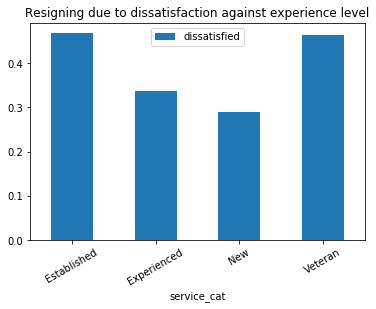

In [58]:
#Filling in missing values#
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

#combined_updated['dissatisfied'].value_counts(dropna=False)

dis_percent = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
# This calculates the percentage of dissatified employees in each service category

#Plotting the results
%matplotlib inline

dis_percent.plot(kind='bar', rot=30, title='Resigning due to dissatisfaction against experience level')

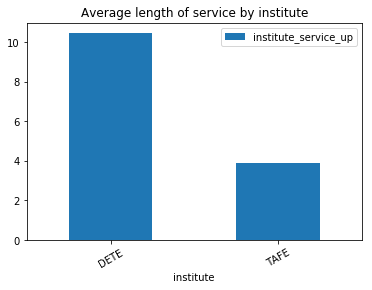

In [59]:
survey_service_cat = combined_updated.pivot_table(index='institute', values='institute_service_up')

survey_service_cat.plot(kind='bar', rot=30, title='Average length of service by institute')

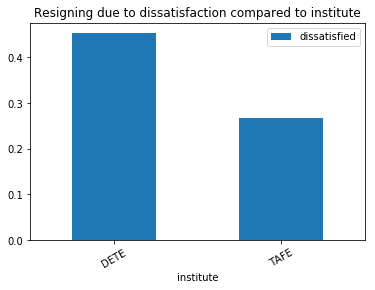

In [60]:
institute_diss = combined_updated.pivot_table(index='institute', values='dissatisfied')

institute_diss.plot(kind='bar', rot=30, title='Resigning due to dissatisfaction compared to institute')

From this initial analysis, one can say that employees who have been working for TAFE or DETE for more than 7 years are more likely to resign due to dissatisfaction compared to newer employees. DETE employees have on average been in the same job longer compared to TAFE employees. Additionally, DETE employees are on average more dissatisfied compared to TAFE employees. Overall, employees who resigned due to job dissatisfaction were employees who worked there for a long time.

## Further analysis

This section of analysis is looking to answer the second question set out in the beginning, which is: Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [61]:
combined_updated.isnull().sum().sort_values()

dissatisfied             0
id                       0
institute                0
separation_type          0
cease_date              16
position                53
employment_status       54
age                     55
gender                  59
institute_service       88
institute_service_up    88
service_cat             88
dtype: int64

The columns that still have some missing values are: cease_date, position, employment_status, age, gender, institute_service, institute_service_up, and service_cat. The columns that are most relevant in answering this question are the dissatisfied column and the age column. 

In [62]:
combined_updated.describe(include='all')

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separation_type,institute_service_up,service_cat
count,596,635.000000,651,597,592,6.510000e+02,651,563,598,651,563.000000,563
unique,11,NaN,2,6,2,NaN,2,49,21,4,NaN,4
top,41-45,NaN,False,Permanent Full-time,Female,NaN,TAFE,Less than 1 year,Administration (AO),Resignation,NaN,New
freq,93,NaN,419,256,424,NaN,340,73,148,340,NaN,193
mean,NaN,2011.963780,NaN,NaN,NaN,3.314265e+17,NaN,NaN,NaN,NaN,7.067496,NaN
std,NaN,1.079028,NaN,NaN,NaN,3.172210e+17,NaN,NaN,NaN,NaN,8.251974,NaN
min,NaN,2006.000000,NaN,NaN,NaN,4.000000e+00,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,2011.000000,NaN,NaN,NaN,4.525000e+02,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2012.000000,NaN,NaN,NaN,6.341820e+17,NaN,NaN,NaN,NaN,4.000000,NaN
75%,NaN,2013.000000,NaN,NaN,NaN,6.345770e+17,NaN,NaN,NaN,NaN,10.000000,NaN


In [63]:
combined_updated['position'].value_counts()

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
School Administrative Staff                                  8
Technical Officer                                            8
Schools Officer                                              7
Workplace Training Officer                                   6
Technical Officer (TO)                                       5
School Based Professional Staff (Therapist, nurse, etc)      5
Executive (SES/SO)                                     

I've decided to replace the missing values in the gender with Female, as that is the most common gender.

In [64]:
combined_updated['gender'] = combined_updated['gender'].fillna('Female')

In [65]:
combined_updated['gender'].value_counts()

Female    483
Male      168
Name: gender, dtype: int64

In [66]:
combined_updated['age'].value_counts(dropna=False)

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
NaN              55
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

We're going to replace the missing values in the age category with the most common age category, which is 41-45. Additionally, there are some age categories that have overlapping ages, so we will combine those categories into one.

In [67]:
combined_updated['age'] = combined_updated['age'].fillna('41-45')

In [68]:
combined_updated['age'].value_counts(dropna=False)

41-45            148
46-50             81
36-40             73
51-55             71
26-30             67
21-25             62
31-35             61
56 or older       29
56-60             26
61 or older       23
20 or younger     10
Name: age, dtype: int64

In [69]:
# Categorising ages #

def age_sort(age):
    
    if age == '56-60':
        return '56 or older'
    elif age == '61 or older':
        return '56 or older'
    else:
        return age

In [70]:
combined_updated['age'] = combined_updated['age'].apply(age_sort)

combined_updated['age'].value_counts()

41-45            148
46-50             81
56 or older       78
36-40             73
51-55             71
26-30             67
21-25             62
31-35             61
20 or younger     10
Name: age, dtype: int64

In [71]:
combined_updated.isnull().sum().sort_values()

age                      0
dissatisfied             0
gender                   0
id                       0
institute                0
separation_type          0
cease_date              16
position                53
employment_status       54
institute_service       88
institute_service_up    88
service_cat             88
dtype: int64

In [72]:
combined_updated['cease_date'].value_counts(dropna=False)

 2012.0    223
 2013.0    201
 2011.0    116
 2010.0     70
 2014.0     22
NaN         16
 2009.0      2
 2006.0      1
Name: cease_date, dtype: int64

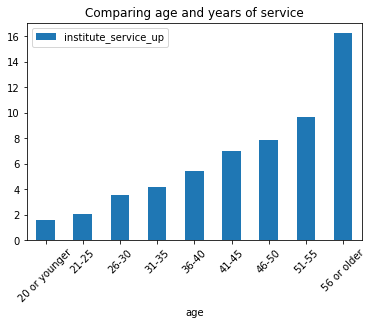

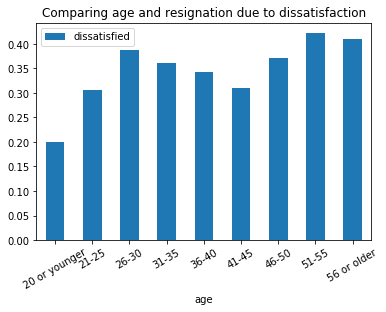

In [73]:
age_service = combined_updated.pivot_table(index='age', values='institute_service_up')#this is a pivot table comparing age to number of years worked

age_service.plot(kind='bar', rot=45, title='Comparing age and years of service')

age_diss = combined_updated.pivot_table(index='age', values='dissatisfied')

age_diss.plot(kind='bar', rot=30, title='Comparing age and resignation due to dissatisfaction')

On average, the age groups that show the highest dissatisfaction tend to be older. However, from the data shown above, other than the age group '20 or younger' at least 30% of people in each respective age group resigned due to dissatisfaction. Overall both younger and older employees resign due to dissatisfaction quite commonly. 

As we would expect, on average, older employees worked at TAFE or DETE for longer before they resigned. As established previously, employees who had been working at TAFE or DETE for 7 or more years were more likely to resign due to job dissatisfaction, which matches with the fact that those employees tend to be older, and links with the fact that the age groups that are most likely to leave due to job dissatisfaction are generally older. 

However, the 26-30 age group has a relatively high percentage of people who resigned due to job dissatisfaction, despite the fact that the average numbers of years worked at either institute for this age group is 4 years, which seems to contradict the idea that generally it's former employees who have been working at either institute for more than 7 years.

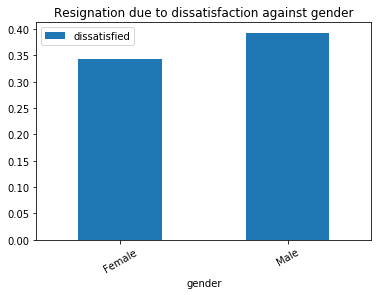

In [74]:
gender_diss = combined_updated.pivot_table(index='gender', values='dissatisfied')

gender_diss.plot(kind='bar', rot=30, title='Resignation due to dissatisfaction against gender')

Between males and females, there isn't much distinction in terms of resigning due to dissatisfaction.